In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
dataset = pd.read_csv("C:/Users/kusha/Desktop/python/Measuring the Heart Attach using MLapproach/M1/M1-20221102T073449Z-001/M1/preprocess_dataset/Preprocessed_Dataset.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1,1
1,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2,1
2,41,0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2,1
3,56,1,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2,1
4,57,0,0.0,120.0,244.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3,0
299,45,1,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3,0
300,68,1,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3,0
301,57,1,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3,0


In [9]:
dataset.shape

(303, 14)

In [10]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1,1
1,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2,1
2,41,0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2,1
3,56,1,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2,1
4,57,0,0.0,120.0,244.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2,1


In [11]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3,0
299,45,1,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3,0
300,68,1,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3,0
301,57,1,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3,0
302,57,0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2,0


In [12]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 33.3 KB


In [14]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.963696,131.267327,244.617162,0.148515,0.551155,149.914191,0.310231,1.041584,1.386139,0.719472,2.313531,0.544554
std,9.082101,0.466011,1.033544,17.121435,50.321206,0.356198,0.524111,22.136525,0.463353,1.149714,0.603033,1.021548,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.500000,0.000000,0.000000,139.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,244.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,269.500000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


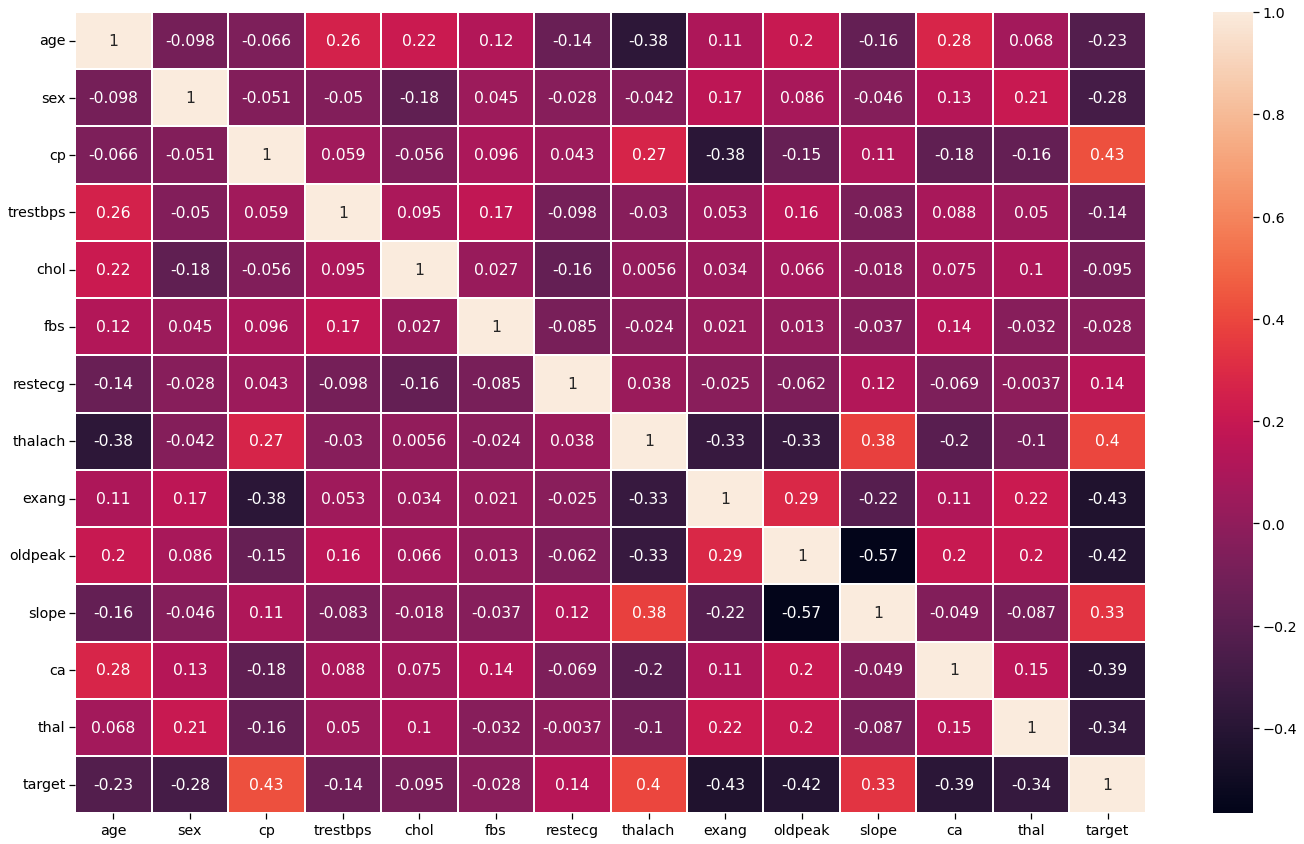

In [15]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(dataset.corr(),annot=True,linewidth =2)
plt.tight_layout()

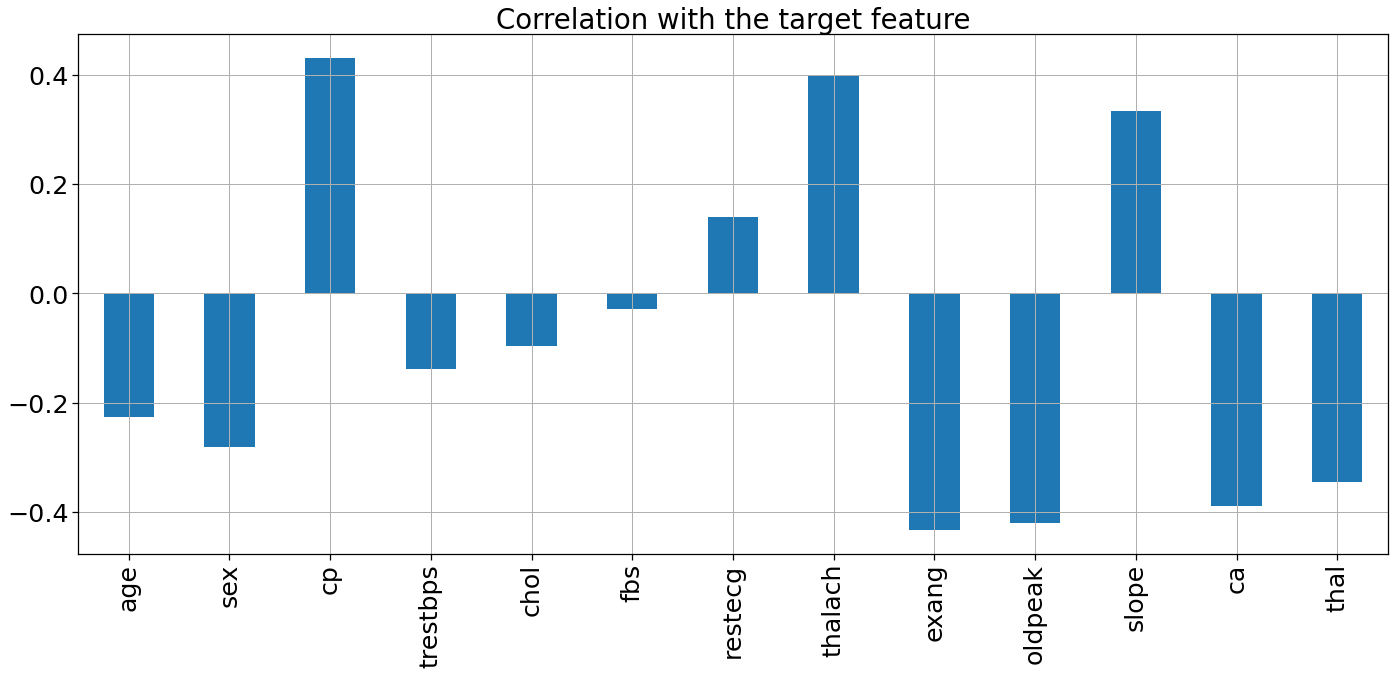

In [16]:
sns.set_context('notebook',font_scale = 2.3)
dataset.drop('target', axis=1).corrwith(dataset.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()


Text(0.5, 1.0, 'Age Analysis')

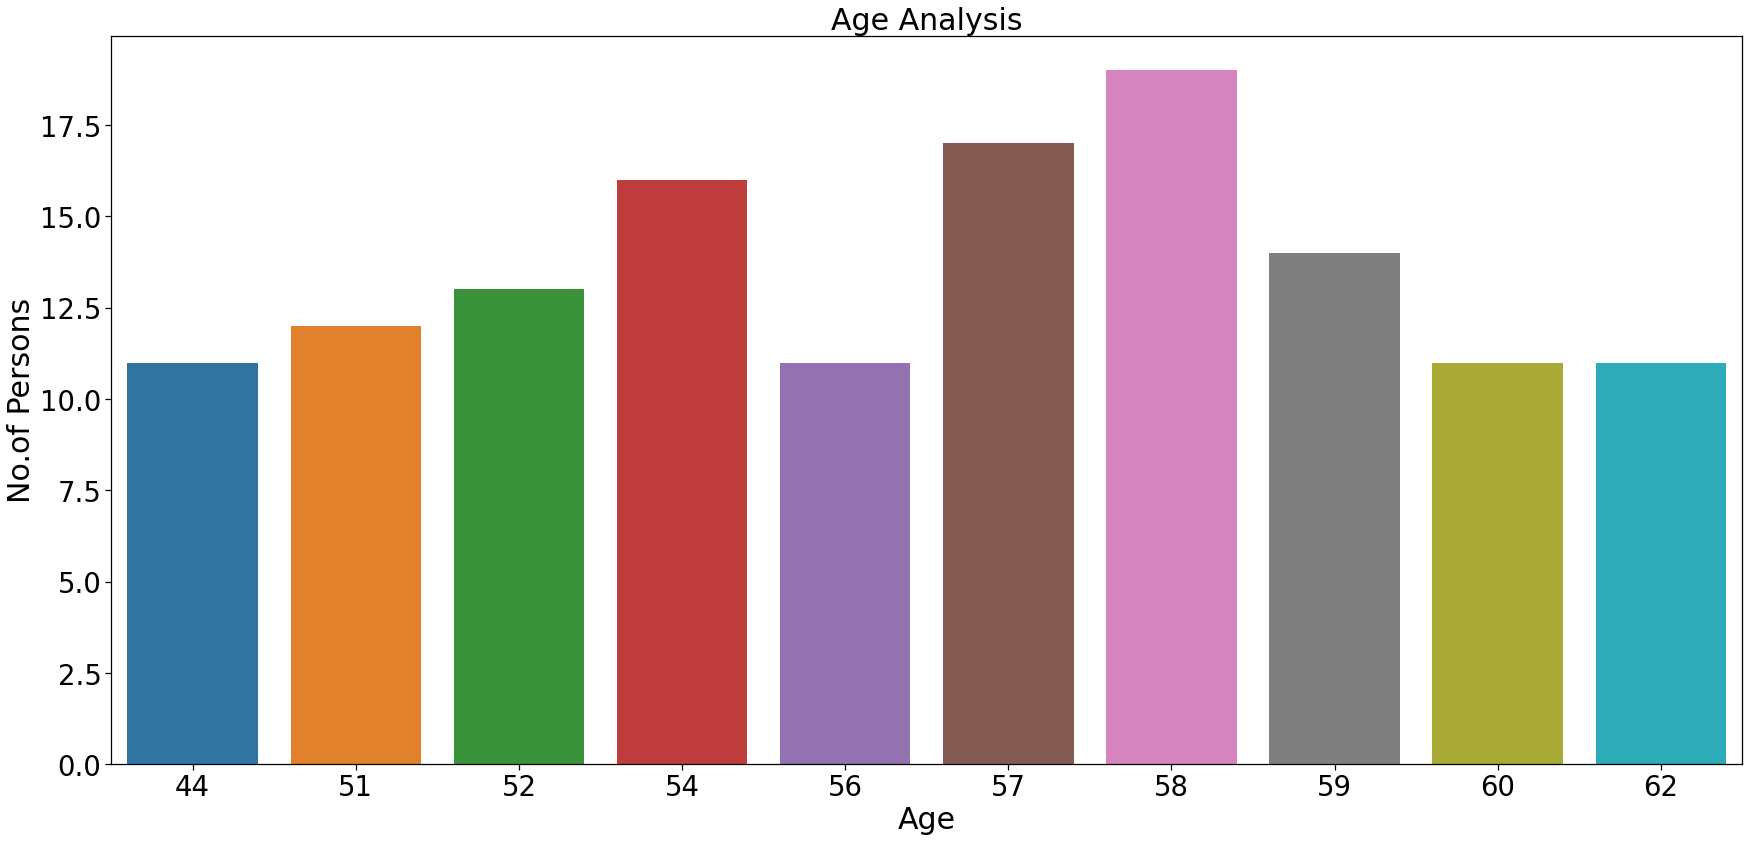

In [17]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 2.5)
sns.barplot(x=dataset.age.value_counts()[:10].index,y=dataset.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('No.of Persons')
plt.tight_layout()
plt.title("Age Analysis")

In [18]:
minAge=min(dataset.age)
maxAge=max(dataset.age)
meanAge=dataset.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


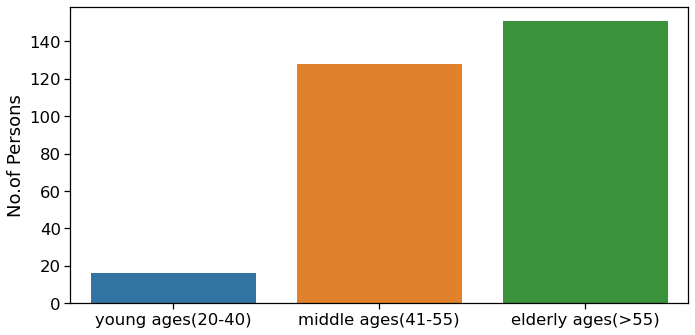

In [19]:
Young = dataset[(dataset.age>=29)&(dataset.age<40)]
Middle = dataset[(dataset.age>=40)&(dataset.age<55)]
Elder = dataset[(dataset.age>55)]

plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages(20-40)','middle ages(41-55)','elderly ages(>55)'],y=[len(Young),len(Middle),len(Elder)])
plt.ylabel("No.of Persons")
plt.tight_layout()

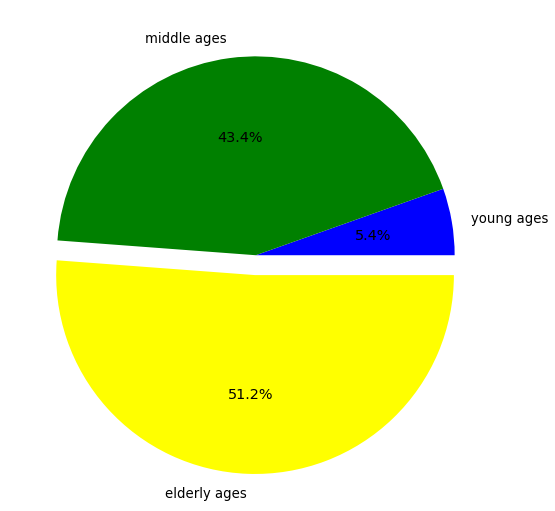

In [20]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(8,9))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

No handles with labels found to put in legend.


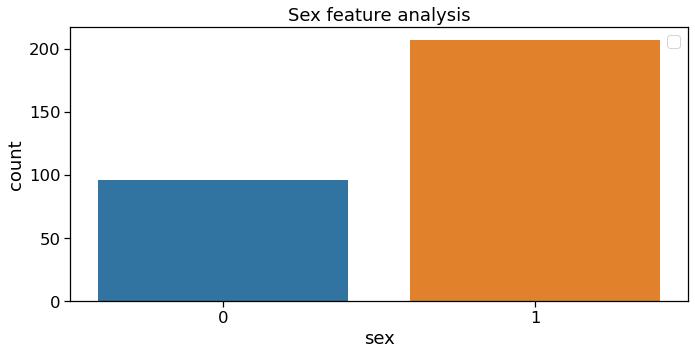

In [21]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dataset['sex'])
plt.plot(color="b",label2="female")
plt.plot(color="o",label3="male")
plt.tight_layout()
plt.legend()
plt.title("Sex feature analysis")
plt.show()

Text(0.5, 1.0, 'relation b/w sex and slope')

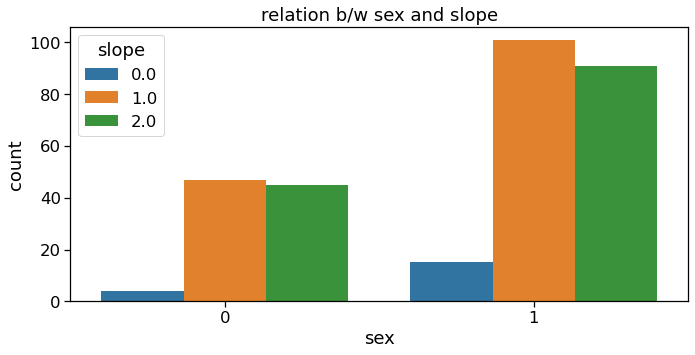

In [22]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dataset['sex'],hue=dataset["slope"])
plt.tight_layout()
plt.title("relation b/w sex and slope")

Text(0.5, 1.0, 'cp analysis')

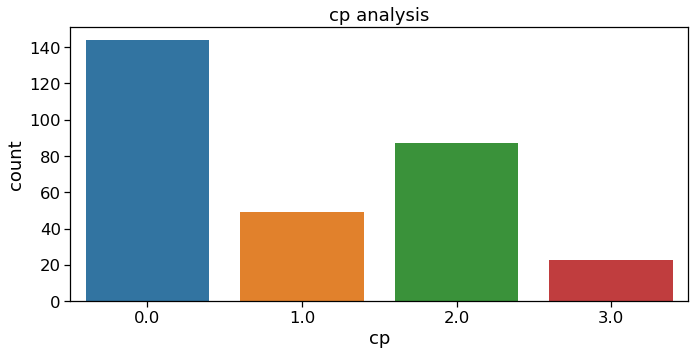

In [23]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dataset['cp'])
plt.tight_layout()
plt.title("cp analysis")

Text(0.5, 1.0, 'Thal analysis')

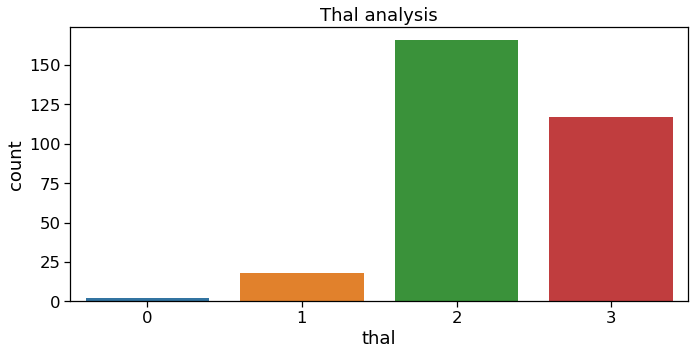

In [24]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dataset['thal'])
plt.tight_layout()
plt.title("Thal analysis")

Text(0.5, 1.0, 'Count of each Target Class')

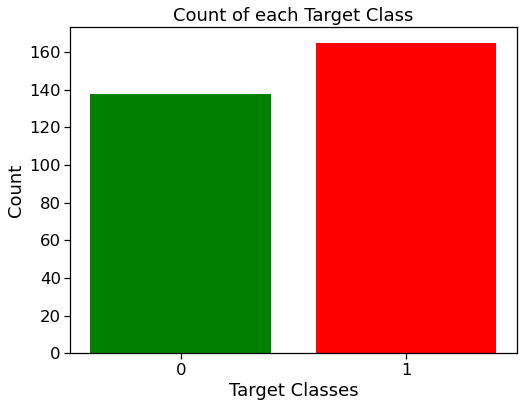

In [25]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [26]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [27]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [28]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [37]:
knn_scores = []
for k in range(1,21):
    Model = KNeighborsClassifier(n_neighbors = k)
    Model.fit(X_train, y_train)
    knn_scores.append(Model.score(X_test, y_test))

In [36]:
kn_sc=knn_scores[7]*100
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 86.0% with 8 nieghbors.


In [28]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

In [29]:
svc_sc=svc_scores[0]*100
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 84.0% with linear kernel.


In [30]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

In [31]:
dt_sc=dt_scores[17]*100
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 78.0% with [2, 4, 18] maximum features.


In [32]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

In [33]:
rf_sc=rf_scores[1]*100
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 83.0% with [100, 500] estimators.


In [34]:
model_al=pd.DataFrame({'KNN':kn_sc,'decision':dt_sc,'random':rf_sc,'svc':svc_sc},index=[0])

In [35]:
model_al

,KNN,decision,random,svc
0,86.0,78.0,83.0,84.0


In [36]:
models=list(model_al.keys())
scores=[kn_sc,dt_sc,rf_sc,svc_sc]

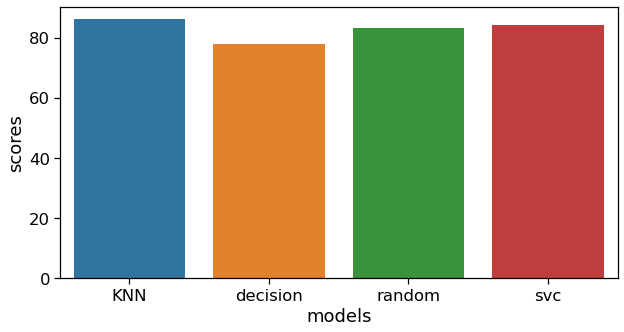

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=models,y=scores)
plt.xlabel('models')
plt.ylabel('scores')
plt.show()

In [38]:
import pickle

In [39]:
with open('C:/Users/kusha/Desktop/python/Measuring the Heart Attach using MLapproach/M2/M2-20221102T073727Z-001/M2/Model/heart_model.pickle','wb') as f:
    pickle.dump(Model,f)
    f.close()

In [40]:
model = pickle.load(open('C:/Users/kusha/Desktop/python/Measuring the Heart Attach using MLapproach/M2/M2-20221102T073727Z-001/M2/Model/heart_model.pickle', 'rb'))
print("Model Successfully created...!")

Model Successfully created...!
